# Dataset Variability

last updated: 03-22-2022

In [1]:
cd ../..

/home/cridonoso/Documents/astromer


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from core.preprocess.tools import get_moments

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

This tutorial assumes you already have the `/data/raw_data/` folder created with the `metadata.csv` and `LCs` folder

In [3]:
raw_data = './data/raw_data/alcock/'

In [4]:
metadata = pd.read_csv(os.path.join(raw_data, 'metadata.csv'))

In [5]:
subsample = metadata

We are gonna calculate some variability indices (or moments), such as skewness, kurtossis and standard deviation

In [6]:
%%time
var_df = get_moments(subsample, n_jobs=7)

/home/cridonoso/miniconda3/envs/tf2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


CPU times: user 5.49 s, sys: 164 ms, total: 5.65 s
Wall time: 18.6 s


(0.0, 20000.0)

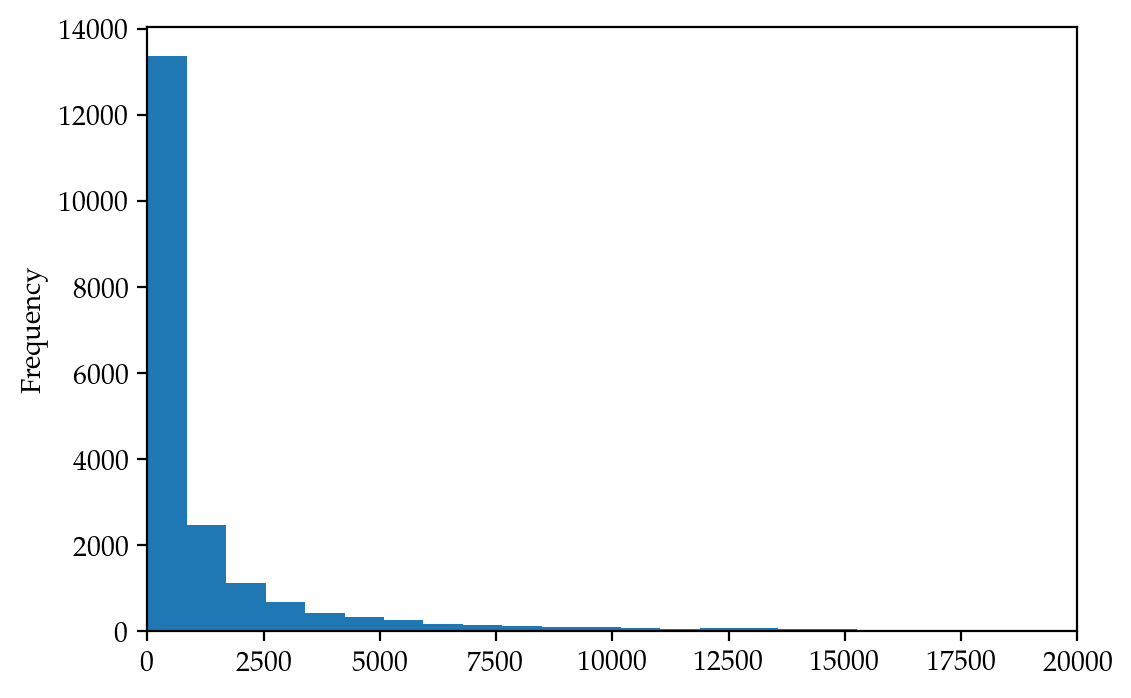

In [27]:
# plt.figure()
# plt.hist(var_df['eta_e'], bins=100)
# plt.show()

fig, ax = plt.subplots(1,1, dpi=200)

var_df['eta_e'].astype('float').plot(kind='hist', bins=10000, ax=ax)

# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 20000)

In [58]:
foo = var_df[var_df['eta_e'].astype(float)>400]
foo.shape, var_df['eta_e'].shape, var_df[(var_df['skew'].astype(float).abs()>1) & \
                                         (var_df['kurt'].astype(float).abs()>10) & \
                                        (var_df['std'].astype(float)>0.1)].shape

((10036, 5), (21444,), (8052, 5))

In [59]:
foo_2 = var_df[(var_df['skew'].astype(float).abs()>1) & \
                                         (var_df['kurt'].astype(float).abs()>10) & \
                                        (var_df['std'].astype(float)>0.1)]

In [60]:
foo_3 = pd.merge(foo, foo_2, on='ID')
foo_3.shape

(4766, 9)

/tmp/ipykernel_181264/547031026.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = pd.plotting.scatter_matrix(var_df.iloc[:, 1:].astype(float),


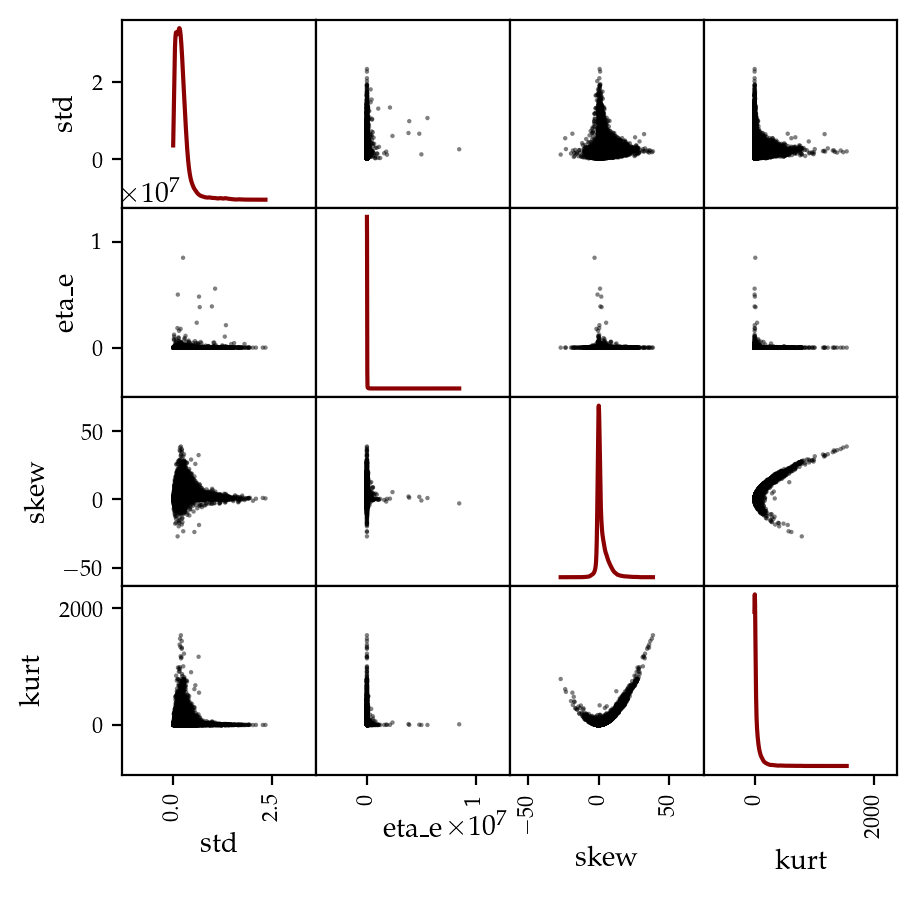

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=200)

g = pd.plotting.scatter_matrix(var_df.iloc[:, 1:].astype(float), 
                               ax=ax, 
                               marker = '.',
                               diagonal='kde',
                               hist_kwds = {'bins': 100}, 
                               density_kwds={'color':'darkred'},
                               s = 10, alpha = 0.5, color='k',
                              range_padding=1.1)

plt.show()